Import Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


Load Dataset

In [2]:
df = pd.read_csv("Unemployment in India.csv")

In [3]:
df

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Remove extra spaces from column names

In [4]:

df.columns = df.columns.str.strip()


Check missing values

In [5]:
df.isnull().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


Drop rows with missing values

In [15]:
df = df.dropna().copy()

Convert Date Column

In [16]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

Rename Columns (for readability)

In [17]:
df = df.rename(columns={
    'Estimated Unemployment Rate (%)': 'Unemployment_Rate',
    'Estimated Employed': 'Employed',
    'Estimated Labour Participation Rate (%)': 'Labour_Participation_Rate'
})

Feature engineering

In [18]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Covid_Period'] = df['Year'].apply(
    lambda x: 'Pre-Covid' if x < 2020 else 'Covid'
)

In [19]:
print(df.head())
print(df.info())

           Region       Date Frequency  Unemployment_Rate    Employed  \
0  Andhra Pradesh 2019-05-31   Monthly               3.65  11999139.0   
1  Andhra Pradesh 2019-06-30   Monthly               3.05  11755881.0   
2  Andhra Pradesh 2019-07-31   Monthly               3.75  12086707.0   
3  Andhra Pradesh 2019-08-31   Monthly               3.32  12285693.0   
4  Andhra Pradesh 2019-09-30   Monthly               5.17  12256762.0   

   Labour_Participation_Rate   Area  Year  Month Covid_Period  
0                      43.24  Rural  2019      5    Pre-Covid  
1                      42.05  Rural  2019      6    Pre-Covid  
2                      43.50  Rural  2019      7    Pre-Covid  
3                      43.97  Rural  2019      8    Pre-Covid  
4                      44.68  Rural  2019      9    Pre-Covid  
<class 'pandas.core.frame.DataFrame'>
Index: 740 entries, 0 to 753
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------   

Analysis

Average unemployment over time

In [20]:
trend = df.groupby('Date')['Unemployment_Rate'].mean()

Visualization

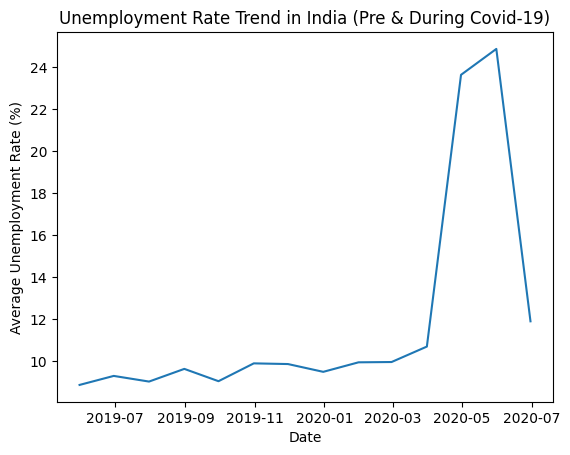

In [21]:
plt.figure()
plt.plot(trend.index, trend.values)
plt.xlabel('Date')
plt.ylabel('Average Unemployment Rate (%)')
plt.title('Unemployment Rate Trend in India (Pre & During Covid-19)')
plt.show()

Covid vs Pre-Covid Comparison

In [22]:
print(df.groupby('Covid_Period')['Unemployment_Rate'].mean())

Covid_Period
Covid        15.101581
Pre-Covid     9.399047
Name: Unemployment_Rate, dtype: float64
